In [4]:
import numpy as np
import pandas as pd

In [5]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/longtogeny_males_raw_usage_matrix_v00.parquet')
df = df[keep_syllables]

In [7]:
weeks = (df.index.get_level_values('age') * 7) // 7

In [11]:
df['weeks'] = weeks

In [12]:
df = df.set_index('weeks', append=True)

In [15]:
sample = df.groupby([weeks, 'mouse'], observed=True).first()

In [45]:
mouse_avg_ac = {}
concat_acs = []
for mouse, _df in sample.groupby('mouse'):

    all_acs = []
    for syll in _df.columns:
        ac = {}
        for l in range(-40, 40):
            c = _df[syll].autocorr(l)
            ac[l] = c
    
        ser = pd.Series(ac, name=syll)
        ser.index.name = 'time'
        all_acs.append(ser)
    all_acs = pd.DataFrame(all_acs).T
    mouse_avg_ac[mouse] = all_acs.mean(1)
    # all_acs['mouse'] = mouse
    concat_acs.append(all_acs)
concat_acs = pd.concat(concat_acs)
syll_ac_avg = concat_acs.groupby('time').mean()

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees 

[Text(0.5, 0, 'Shift (weeks)')]

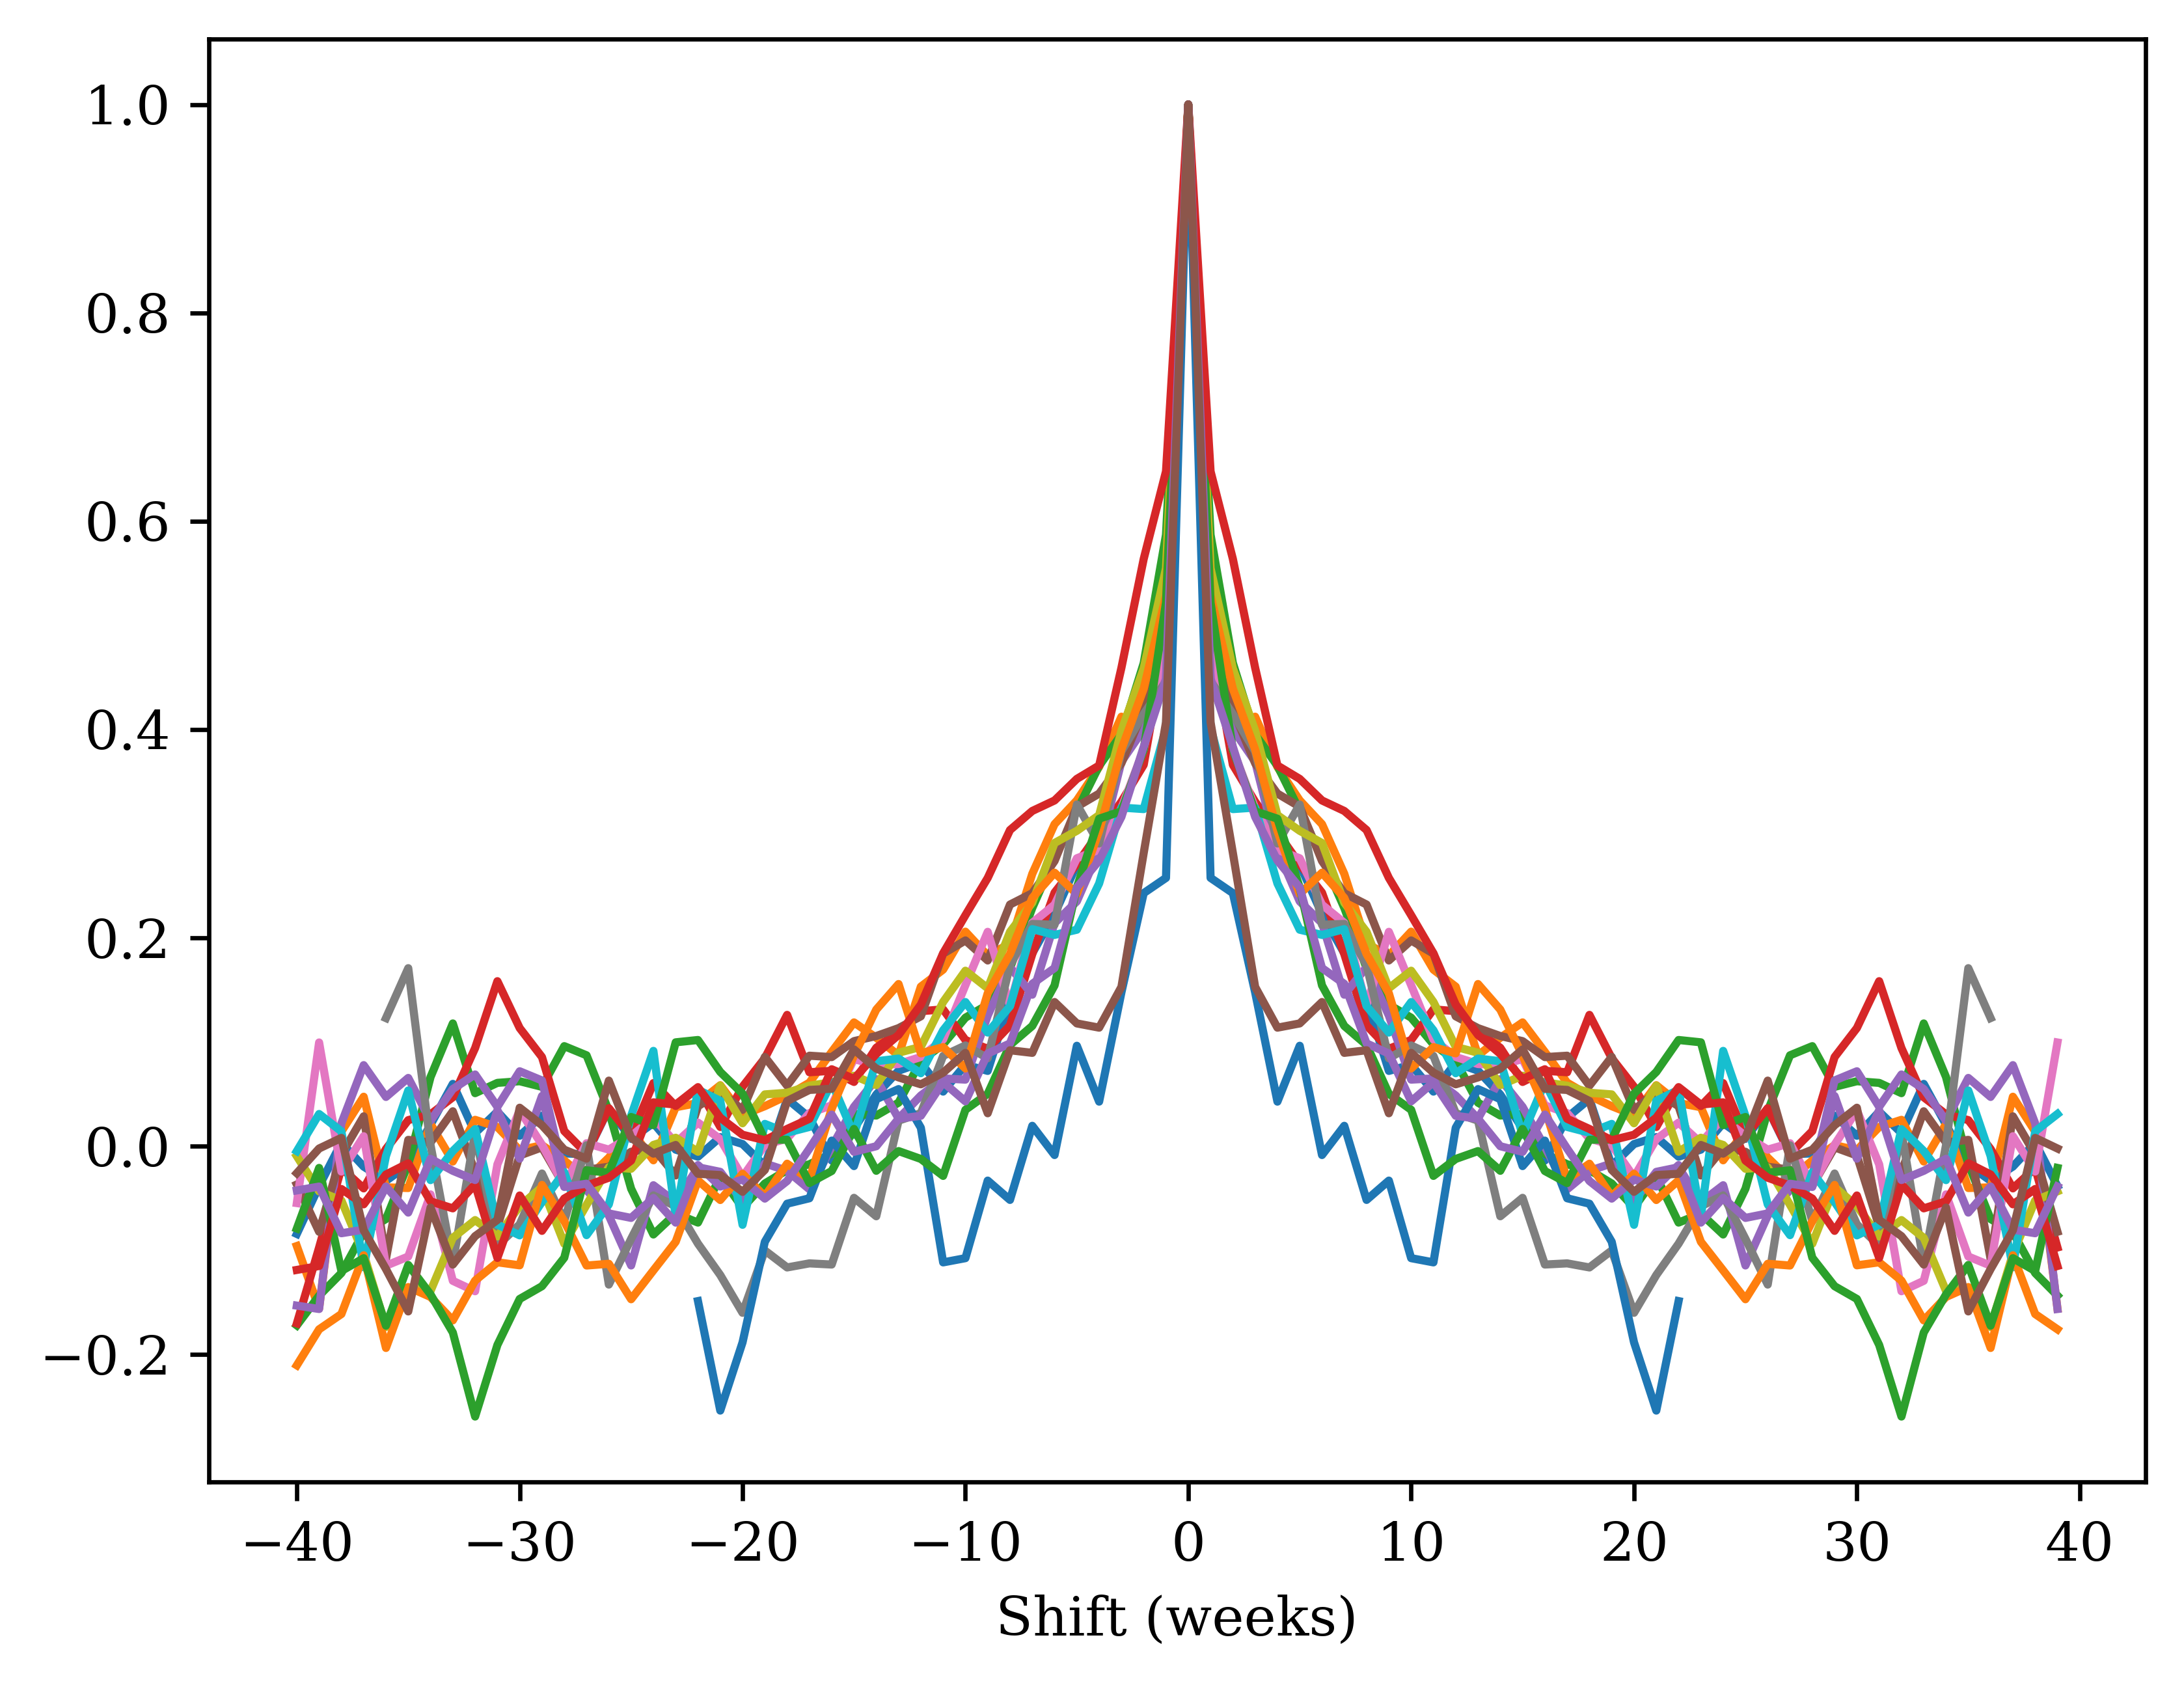

In [49]:
for k, v in mouse_avg_ac.items():
    ax = v.plot()
ax.set(xlabel="Shift (weeks)")

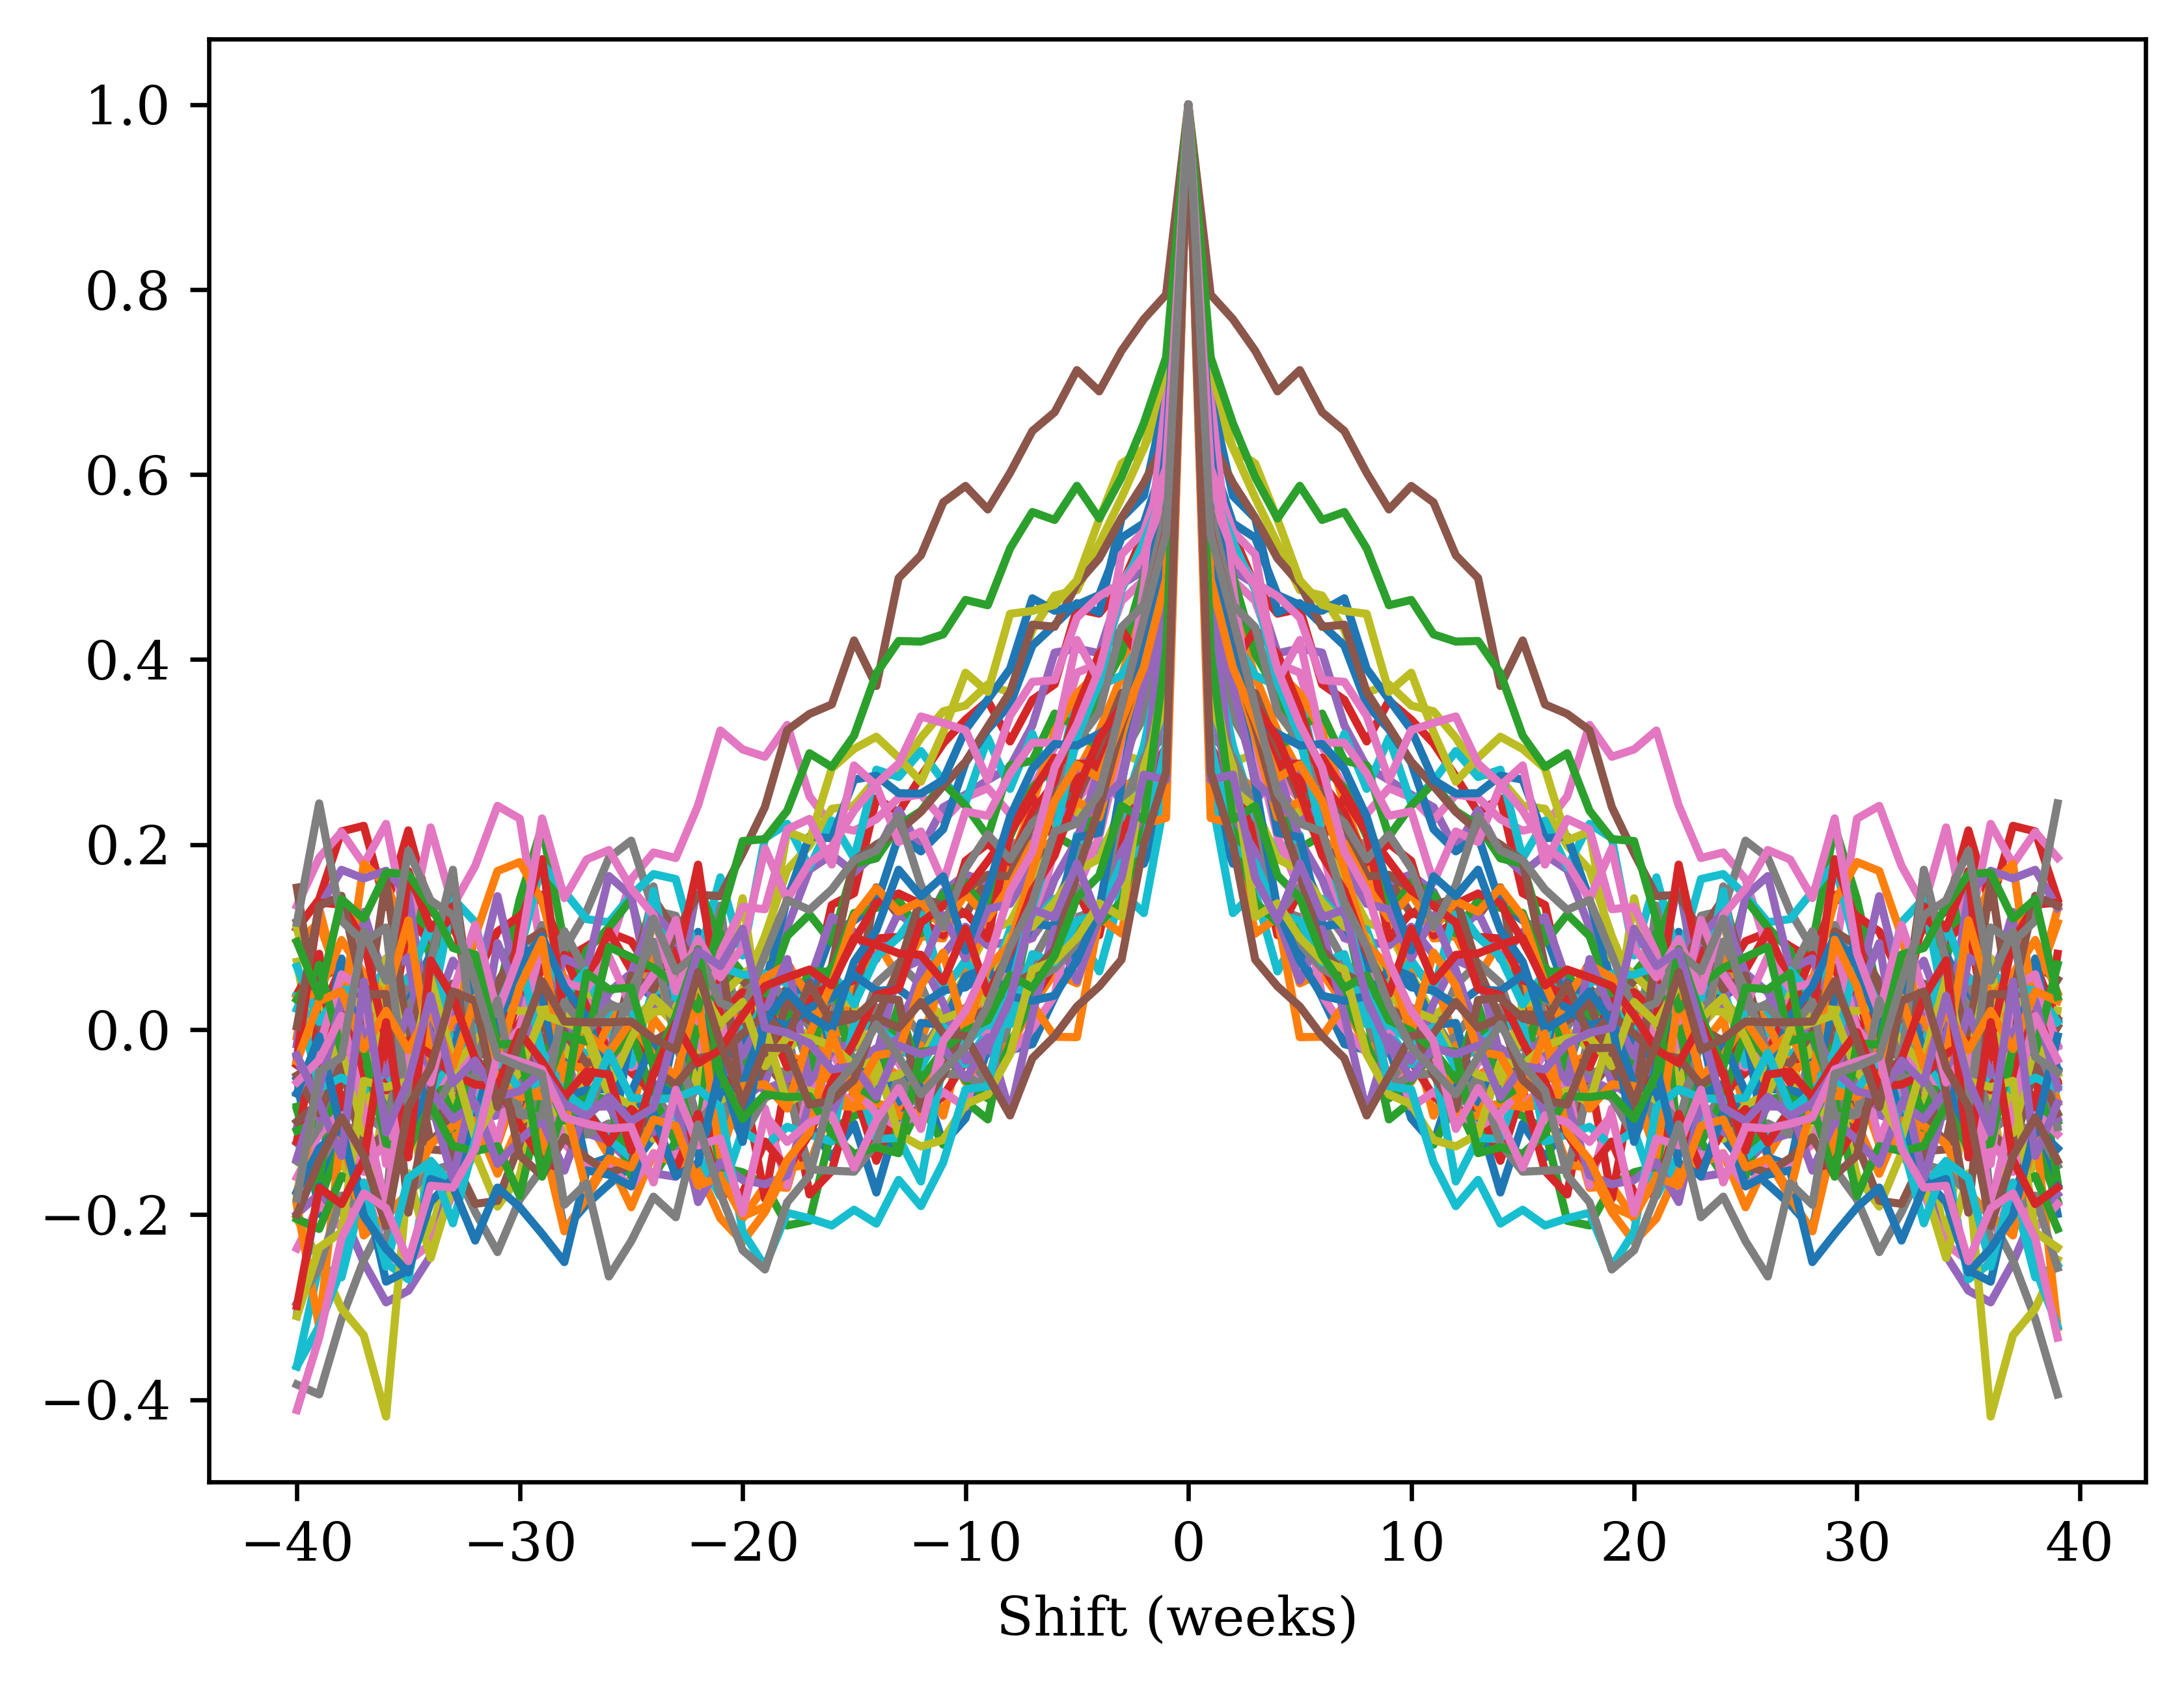

In [50]:
ax = syll_ac_avg.plot()
ax.set(xlabel="Shift (weeks)")
ax.legend_.remove()